# Worksheet - Blog medium "Second-order differential equations to describe vibrations"

This worksheet is related to the blog "Second-order differential equations to describe vibrations".

## Import packages

We need several packages to make the necessary calculations. One of them is SymPy; a package that we can use to generate analytical solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
from sympy.utilities.lambdify import lambdify

# https://docs.sympy.org/latest/modules/solvers/ode.html

## Figure settings

Some settings for the figures.

In [2]:
cm = 1/2.54  # centimeters in inches
figsize = [8*cm,8*cm]; # Standard figure width: 10cm
#plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 13

## Parameters

Settings of several parameters: time-related and properties of the system.

In [3]:
N = 100; # Number of time increments
dt = 0.2; # Time density
t0 = 0; # Start of time
tend = N*dt; # Ending time

In [4]:
m=10; # Mass [kg]
k=20; # Spring stiffness [N/m]
F0=30; # Amplitude of the external force [N]

In [5]:
ω0=np.sqrt(k/m); # Undamped eigenfrequency [rad/s]
ω=2; # Excitation frequency [rad/s]

## Initial conditions

Since we are dealing with a second-order differential equation; we need two initial conditions. The first one is related to the initial displacement, the second one to the first derivative with respect to time; the velocity.

In [6]:
u_0 = 1; # Initial condition - related to the initial displacement
v_0 = 2; # Initial condition - related to the initial velocity

u0=u_0;
v0=v_0;

## Use solution as derived in the blog

Below we use the solution as derived in the blog "Second-order differential equations to describe vibrations", which you can read at www.medium.com

In [7]:
u = np.zeros(N);
t = np.zeros(N);

In [8]:
for i in range(N):
    t[i] = dt*i;
    u[i] = (u0-(F0/k)*(1/(1-(ω**2/ω0**2))))*np.cos(dt*i*ω0)+(v0/ω0)*np.sin(dt*i*ω0)+(F0/k)*(1/(1-(ω**2/ω0**2)))*np.cos(dt*i*ω);

## Check the solution with SciPy

We can check our derived solution with SciPy. Let's implement this.

In [9]:
# https://stackoverflow.com/questions/58034695/sympy-solving-differential-equation-with-initial-conditions-error

f = Function('f');
sol1 = dsolve(Derivative(f(x),x,x)*m + f(x)*k - F0*cos(ω*x), ics={ f(0): u_0, Derivative(f(x), x).subs(x,0): v_0  }  );

In [10]:
lambsol = lambdify(x,sol1.rhs);

In [11]:
solan = np.zeros(N);

In [12]:
for i in range(N):
    t[i] = dt*i;
    solan[i] = lambsol(t[i]);

## Combine the plots

Below the plots of the solution - derived by hand - and SciPy.

<Figure size 226.772x226.772 with 0 Axes>

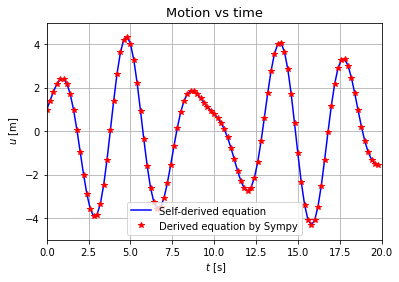

In [13]:
plt.figure(figsize=(figsize[0],figsize[1]));
plt.figure();
plt.plot(t,u,"b",label="Self-derived equation");
plt.plot(t,solan,"r*",label="Derived equation by Sympy");
plt.grid();
plt.xlabel(r" $t$ [s]");
plt.ylabel(r" $u$ [m]");
plt.title("Motion vs time");
plt.xlim([0,tend]);
plt.ylim([-5,5]);
plt.legend();

## Analyze particular solution

The particular solution is a solution that in the end will behave in phase (or anti-phase) with the excitation. And indeed, we can see that in the plot below. 

In [14]:
upart = np.zeros(N);
uext = np.zeros(N);

In [15]:
for i in range(N):
    t[i] = dt*i;
    upart[i] = (F0/k)*(1/(1-(ω**2/ω0**2)))*np.cos(dt*i*ω);
    uext[i] = F0*cos(dt*i*ω);

<Figure size 226.772x226.772 with 0 Axes>

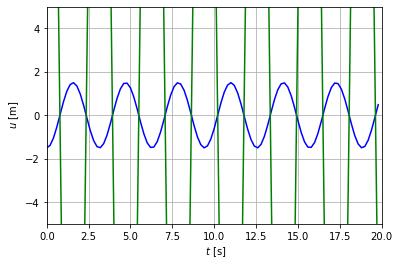

In [16]:
plt.figure(figsize=(figsize[0],figsize[1]));
plt.figure();
plt.plot(t,upart,"b",label="Particular solution");
plt.plot(t,uext,"g",label="External force");
plt.grid();
plt.xlabel(r" $t$ [s]");
plt.ylabel(r" $u$ [m]");
plt.xlim([0,tend]);
plt.ylim([-5,5]);